In [1]:
using Plots

In [2]:
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [3]:
include("cavitymethod.jl")

rho_bouchaud_population (generic function with 1 method)

In [4]:
Plots.scalefontsizes(1.5)

In [5]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
ensemble = Int64(10^5);

In [6]:
e

e = 2.7182818284590...

## Overview

In [7]:
T = 0.1
lambda_barrat = -logspace(-10.,-1, 100);

In [8]:
c = 5

5

In [9]:
epsilon2 = [1.e-3, 1.e-4,1.e-5,1.e-6, 1.e-10];

In [10]:
rho_ba = [rho_bouchaud_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2[1]) for i in lambda_barrat];

In [11]:
for k in 2:length(epsilon2)
    rho = [rho_bouchaud_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2[k]) for i in lambda_barrat];
    rho_ba = hcat(rho_ba,rho)
end

In [12]:
plot(-lambda_barrat, rho_ba[:,1], label = L"\epsilon ="*"$(epsilon2[1])", yscale = :log10, xscale = :log10);

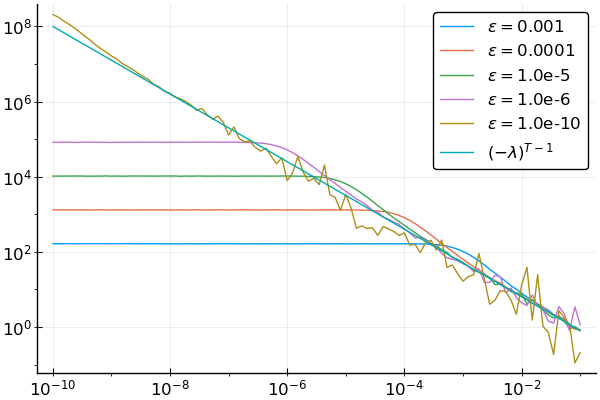

In [13]:
for i in 2:length(epsilon2)
    plot!(-lambda_barrat, rho_ba[:,i], label = L"\epsilon ="*"$(epsilon2[i])")
end
plot!(-lambda_barrat,(-lambda_barrat).^(T-1)*T, label = L"(-\lambda)^{T-1}")

### Height

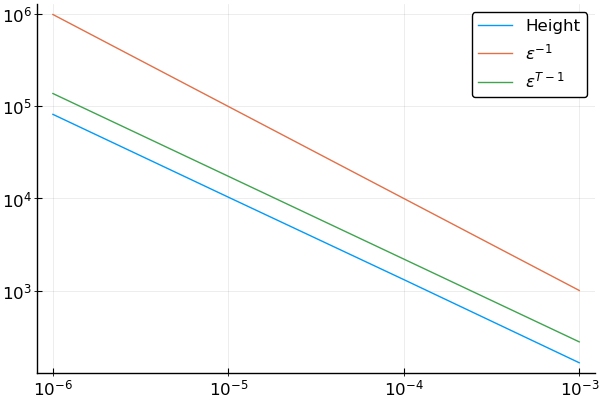

In [51]:
plot(epsilon2[1:end-1], rho_ba[1,:][1:end-1], xscale = :log10, yscale = :log10,
label = "Height")
plot!(epsilon2[1:end-1], (epsilon2.^-1.)[1:end-1], xscale = :log10, yscale = :log10,
label = L"\epsilon^{-1}")
plot!(epsilon2[1:end-1], 
    real((1/4 + im/4)*epsilon2.^(-1+T)*(sp.hyp2f1(1.,T,1+T,1/2-im/2)
    -im*sp.hyp2f1(1.,T,1+T,1/2+im/2)))[1:end-1], 
    xscale = :log10, yscale = :log10, label = L"\epsilon^{T-1}")

In [52]:
##To determine the height use till 10^-6